In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def lfi(dtheta, a, b):
    s = np.sin(np.pi / 4. + dtheta)
    c = np.cos(np.pi / 4. + dtheta)
    num = a + b + (2. * (a - b) * s * c)
    den = (s**4 + c**4) + (2. * (s**2 * c**2))
    return num / den / a / b

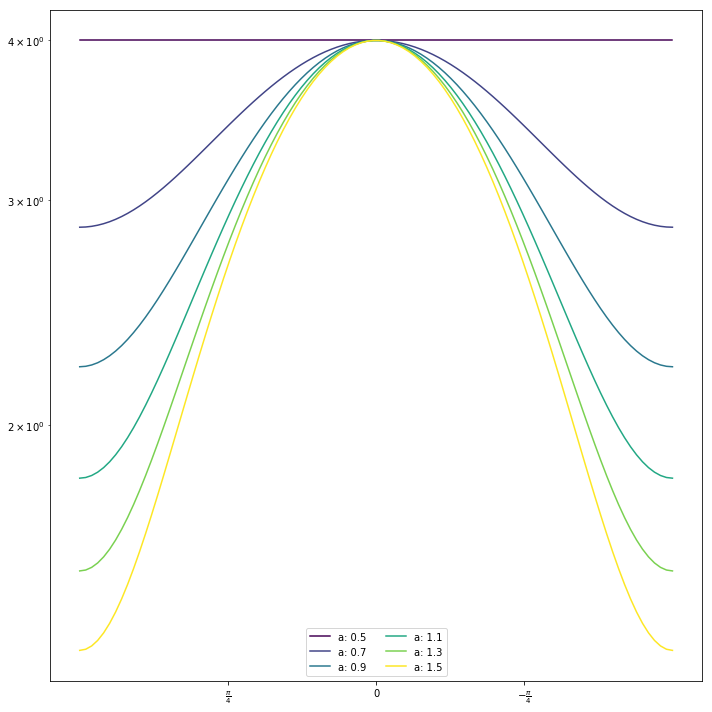

In [3]:
f, ax = plt.subplots(1, figsize=(10, 10))
b = .5
dthetas = np.linspace(-1, 1, 100) * np.pi / 2.


for ap in np.linspace(0, 1, 6):
    a = b + ap
    lfis = lfi(dthetas, a, b)
    ax.semilogy(dthetas, lfis, c=cm.viridis(ap), label='a: {}'.format(np.around(a, 2)))
ax.legend(loc='best', ncol=2)
ax.set_xticks([-np.pi/4, 0, np.pi/4])
ax.set_xticklabels([r'$\frac{\pi}{4}$', 0, r'$-\frac{\pi}{4}$'])
f.tight_layout()

In [10]:
def lfi2(dtheta0, dtheta1, a, b):
    s0 = np.sin(np.pi / 4. + dtheta0)
    c0 = np.cos(np.pi / 4. + dtheta0)
    s1 = np.sin(np.pi / 4. + dtheta1)
    c1 = np.cos(np.pi / 4. + dtheta1)
    sc = (s0 * c0 + s1 * c1) / 2.
    s2 = (s0**2 + s1**2) / 2.
    c2 = (c0**2 + c1**2) / 2.
    num = a + b + (2. * (a - b) * sc)
    den = (s2**2 + c2**2) + (2. * (s2 * c2))
    return num / den / a / b

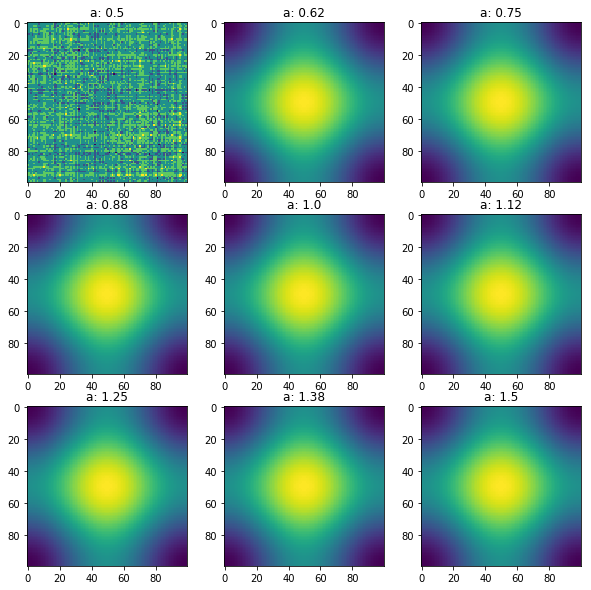

In [12]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
b = .5

maxes = []
for ii, ap in enumerate(np.linspace(0, 1, 9)):
    ax = axes.ravel()[ii]
    a = b + ap
    ax.set_title('a: {}'.format(np.around(a, 2)))
    vals = lfi2(dthetas[np.newaxis], dthetas[:, np.newaxis], a, b)
    maxes.append(vals.max())
    ax.imshow(vals)